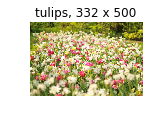

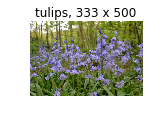

In [30]:
# -*- coding: utf-8 -*-
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

import tensorflow as tf
import numpy as np

slim = tf.contrib.slim

##-----copy the folder datasets as "models/slim/datasets" to this folder.
#cp -r ../../models/slim/datasets .
from datasets import download_and_convert_flowers,dataset_factory

#download_and_convert_flowers.run("/tmp/flowers")
##-----comment out above one-time for download and convert.----

from datasets import flowers

with tf.Graph().as_default(): 
    #dataset = dataset_factory.get_dataset('flowers', 'train', "/tmp/flowers")

    dataset = flowers.get_split('train', "/tmp/flowers")
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in xrange(2):
                np_image, np_label = sess.run([image, label])
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                
                plt.figure(figsize=(2,2))
                plt.imshow(np_image, interpolation='nearest')
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()
                


코드 분석 : download_and_convert_flowers 

https://github.com/YoungKwonJo/models-1/blob/master/slim/datasets/download_and_convert_flowers.py#L139-L147

            image_data = tf.gfile.FastGFile(filenames[i], 'r').read()
            height, width = image_reader.read_image_dims(sess, image_data)

            class_name = os.path.basename(os.path.dirname(filenames[i]))
            class_id = class_names_to_ids[class_name]

            example = dataset_utils.image_to_tfexample(
                image_data, 'jpg', height, width, class_id)
            tfrecord_writer.write(example.SerializeToString())
            
https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/lib/io/tf_record.py#L84-L130

     TFRecordWriter

https://github.com/YoungKwonJo/tensorflow/blob/master/tensorflow/python/platform/gfile.py#L39-L44

    class GFile(_FileIO):
      """File I/O wrappers without thread locking."""

      def __init__(self, name, mode='r'):
      mode = mode.replace('b', '')
      super(GFile, self).__init__(name=name, mode=mode)
https://github.com/YoungKwonJo/tensorflow/blob/master/tensorflow/python/lib/io/file_io.py#L32

    class FileIO(object):

----------------
코드 분석 : dataset_utils.image_to_tfexample

https://github.com/YoungKwonJo/models-1/blob/master/slim/datasets/dataset_utils.py#L56-L63

  def image_to_tfexample(image_data, image_format, height, width, class_id):
    return tf.train.Example(features=tf.train.Features(feature={
      'image/encoded': bytes_feature(image_data),
      'image/format': bytes_feature(image_format),
      'image/class/label': int64_feature(class_id),
      'image/height': int64_feature(height),
      'image/width': int64_feature(width),
    }))

https://github.com/YoungKwonJo/tensorflow/blob/master/tensorflow/python/training/training.py#L261

https://github.com/YoungKwonJo/tensorflow/blob/master/tensorflow/core/BUILD#L1204

https://github.com/YoungKwonJo/tensorflow/blob/master/tensorflow/core/example/example_parser_configuration.h#L22



